# (0) Background for the given data analytics problem and dataset.
Please check the PDF report "Data_Quality_Report_and_Plan_Initial_Findings.pdf" for background and important terminology for this problem.

In [154]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import sklearn
from sklearn.datasets import load_boston
from tqdm import tqdm
import re
from math import radians, cos, sin, asin, sqrt
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

# (1) Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.

 - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as  continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Check the logical integrity of your data. 
    - Save your updated/cleaned data frame to a new csv file.

In [155]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('ppr-21200542.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)

### 1.1 Check how many rows and columns your CSV has.

In [156]:
# Check how many rows and columns your CSV has.
df.shape

(10000, 9)

### 1.2 Print the first and the last 5 rows

In [157]:
# print the first rows
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,13/09/2018,"15 ARDKEALE, MOUNT OVAL VILLAGE, ROCHESTOWN",NaN,Cork,"€250,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,26/09/2016,"APT.6 - THE MILLSTREAM, THE LINKS, PORTMARNOCK",Dublin 13,Dublin,"€249,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/05/2016,"7 THE ORCHARD, DUNCARBERY, TULLAGHAN",NaN,Leitrim,"€50,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,15/11/2016,"ROSE COTTAGE, NEW ST, KILKENNY",NaN,Kilkenny,"€112,500.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,12/05/2016,"16 HARDWICK STREET, CORK, COUNTY CORK",NaN,Cork,"€262,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [158]:
# print the last rows
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,30/08/2013,"49 MOYNE ROAD, THURLES",NaN,Tipperary,"€110,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,08/10/2010,"16 The Drive, Castletown, Celbridge",NaN,Kildare,"€362,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,28/07/2016,"10 BEARU MHOR, COIS BHEARA, ATHY",NaN,Kildare,"€195,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,23/02/2018,"MILTOWN LODGE, JOHNSWELL RD, KILKENNY",NaN,Kilkenny,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/12/2010,"38 Beech House, Carrickmines Green, Glenamuck ...",NaN,Dublin,"€168,675.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...


### 1.3 Convert the features to their appropriate data types (e.g., decide which features are more appropriate as  continuous and which ones as categorical types). 

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1866 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1036 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Based on examining the data in the dataframe, 1 of the features are continuous, 1 of the features are datetime type and the rest categorical.

- *Price (€)* will be converted to **continuous** because it contains continuous values,
- *Date of Sale (dd/mm/yyyy)* will be converted to **datetime type** because it contains datetime type values.
- All other features shall be converted to category type.

In [160]:
# delete currency symbol
df['Price (€)'] = df['Price (€)'].str.strip().str.strip('€')

In [161]:
# Delete commas and placeholders
for i in range(len(df['Price (€)'])):
    df['Price (€)'][i]=df['Price (€)'][i].replace(',','').replace('.00','')
    df['Price (€)'][i]=float(df['Price (€)'][i])


In [162]:
# convert price features to float type
df['Price (€)'] = df['Price (€)'].astype(float)

In [163]:
# convert date features to datetime types
df['Date of Sale (dd/mm/yyyy)'] = df['Date of Sale (dd/mm/yyyy)'].astype('datetime64')

In [164]:
#convert binary outcome to category
df['Address'] = df['Address'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('category')
df['County'] = df['County'].astype('category')
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')
df['Description of Property'] = df['Description of Property'].astype('category')
df['Property Size Description'] = df['Property Size Description'].astype('category')

In [165]:
df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

In [166]:
df.tail(5).T

,9995,9996,9997,9998,9999
Date of Sale (dd/mm/yyyy),2013-08-30 00:00:00,2010-08-10 00:00:00,2016-07-28 00:00:00,2018-02-23 00:00:00,2010-02-12 00:00:00
Address,"49 MOYNE ROAD, THURLES","16 The Drive, Castletown, Celbridge","10 BEARU MHOR, COIS BHEARA, ATHY","MILTOWN LODGE, JOHNSWELL RD, KILKENNY","38 Beech House, Carrickmines Green, Glenamuck ..."
Postal Code,NaN,NaN,NaN,NaN,NaN
County,Tipperary,Kildare,Kildare,Kilkenny,Dublin
Price (€),110000.0,362500.0,195000.0,325000.0,168675.0
Not Full Market Price,No,No,No,No,No
VAT Exclusive,No,No,No,No,Yes
Description of Property,Second-Hand Dwelling house /Apartment,Second-Hand Dwelling house /Apartment,Second-Hand Dwelling house /Apartment,Second-Hand Dwelling house /Apartment,New Dwelling house /Apartment
Property Size Description,NaN,NaN,NaN,NaN,greater than or equal to 38 sq metres and less...


### 1.4 Drop duplicate rows and columns.
We will now check for duplicate rows and columns.

Rows

In [167]:
#check for duplicate rows

#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


Columns

In [168]:
#check if there are any duplicate columns
# First transpose the df so columns become rows
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

#.duplicate returns a Boolean Value so True will be returned if the column is a duplicate
print("Duplpicated columns will be True: ")
print(dfT.duplicated())

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0
Duplpicated columns will be True: 
Date of Sale (dd/mm/yyyy)    False
Address                      False
Postal Code                  False
County                       False
Price (€)                    False
Not Full Market Price        False
VAT Exclusive                False
Description of Property      False
Property Size Description    False
dtype: bool


### 1.5 Drop constant columns
### Categorical Data
In the cell below we will check how many unique values each feature has. If a feature has a unique value of 1 this will tell us that this feature has a constant value.

In [169]:
category_columns = df.select_dtypes(['category']).columns
features_card = list(df[category_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Unique Values"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in category_columns:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Unique Values
-------                              --------------- 

Address                              9983
Postal Code                          23
County                               26
Not Full Market Price                2
VAT Exclusive                        2
Description of Property              2
Property Size Description            5


We can see that all values are greater than one. There are no constant columns in the categorical data.

### Continuous Data
In the cell below we will check how many unique values each feature has. If a feature has a unique value of 1 this will tell us that this feature has a constant value.

In [170]:
category_columns = df.select_dtypes(['float64']).columns
features_card = list(df[category_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Unique Values"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in category_columns:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Unique Values
-------                              --------------- 

Price (€)                            2312


We can see that all values are greater than one. There are no constant columns in the categorical data.

In [171]:
# # Select columns containing categorical data
# categorical_columns = df[['Price (€)']].columns
# # MaxDelq2PublicRecLast12M and MaxDelqEver were chosen as categories because 
# # the data contains single digit values each representing a different meaning

# # Convert data type to category 21200542 for these columns
# for column in categorical_columns:
#     df[column] = df[column].astype('float')  

continuous_features = df.select_dtypes(['float']).columns

# df.dtypes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,281070.168576,1.479695e+06,5271.48,120000.0,200000.0,305000.0,129500000.0


In [172]:
# A way to get the number of unique values for all features
df.nunique()

Date of Sale (dd/mm/yyyy)    2784
Address                      9983
Postal Code                    22
County                         26
Price (€)                    2312
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         2
Property Size Description       4
dtype: int64

## Check for null values

In [173]:
#Missing data all features
df.isnull().sum()

Date of Sale (dd/mm/yyyy)       0
Address                         0
Postal Code                  8134
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8964
dtype: int64

We can see that there are 8134 instances missing data 'Postal Code', and 8964 instances missing data 'Property Size Description'. That will be investiated later on.

In [174]:
numeric_columns = df.select_dtypes(['int', 'float']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

## Examine for erroneous cardinalities and permissible values.
We can see above in the check for constant features that the Address have very high cardinalities. This will need to be addressed later on. For now, it is not useful to look at a list of permitted values for these particular features. The permitted values for the other categorical features will be explored in the cell below.

### Categorical features with low cardinality

In [175]:
# Check for irregular cardinality & permitted values
print("Unique values for: ")
print("Postal Code:", pd.unique(df["Postal Code"].ravel()))
print("County:", pd.unique(df["County"].ravel()))
print("Not Full Market Price:", pd.unique(df["Not Full Market Price"].ravel()))
print("VAT Exclusive:", pd.unique(df["VAT Exclusive"].ravel()))
print("Description of Property:", pd.unique(df["Description of Property"].ravel()))
print("Property Size Description:", pd.unique(df["Property Size Description"].ravel()))

Unique values for: 
Postal Code: [NaN, 'Dublin 13', 'Dublin 16', 'Dublin 1', 'Dublin 18', ..., 'Dublin 3', 'Dublin 22', 'Dublin 12', 'Dublin 20', 'Dublin 17']
Length: 23
Categories (22, object): ['Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12', ..., 'Dublin 6w', 'Dublin 7', 'Dublin 8', 'Dublin 9']
County: ['Cork', 'Dublin', 'Leitrim', 'Kilkenny', 'Wicklow', ..., 'Donegal', 'Monaghan', 'Roscommon', 'Cavan', 'Offaly']
Length: 26
Categories (26, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']
Not Full Market Price: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
VAT Exclusive: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Description of Property: ['Second-Hand Dwelling house /Apartment', 'New Dwelling house /Apartment']
Categories (2, object): ['New Dwelling house /Apartment', 'Second-Hand Dwelling house /Apartment']
Property Size Description: [NaN, 'greater than or equal to 38 sq metres and les..., 'greater than 125 sq metres

Property Size Description contains overlapping values, which are 'greater than 125 sq metres' and 'greater than or equal to 125 sq metres'.

## Categorical features with high cardinality

The issue of high cardinality will be dicussed further in the Data Quality Report and addressed in the Data Quality Plan. However, in this section of the assignment we will visualise and understand the data as it currently is.
Rather than showing the range of values for the features with very high cardinalities, we will now display the top 20 most frequent values for these features. At this stage of this assignment this is the best way to give an idea of the values of these features.

In [176]:
# visualise 20 most frequent values for 'Name_Intake' which has a cardinality of 604
most_frequent_Address_values = df['Address'].value_counts()[:20].sort_values(ascending=False)
most_frequent_Address_values

10 WOODLANDS PARK, RATOATH, MEATH              2
GREAGHRAHAN, BALLYCONNELL, CAVAN               2
25 THORNBERRY DRIVE, WILLOW PARK, ATHLONE      2
Fisherstown Cross, Ballybrittas                2
CARNAMUGGAGH UPPER, LETTERKENNY, DONEGAL       2
248 COLLINS AVE EAST, DONNYCARNEY, DUBLIN 5    2
CURRAHALY, FARRAN, CORK                        2
51 SEA COURT, NEWCASTLE, WICKLOW               2
BOHERCLOUGH STREET, CASHEL, CO TIPPERARY       2
3 STOCKWELL CLOSE, STOCKWELL ST, DROGHEDA      2
FRANCES ST, KILRUSH, CLARE                     2
2 SPRINGVALE RD, PARCNAGOWAN, KILKENNY         2
CHURCH ST, MILLSTREET, CORK                    2
225 VIEWMOUNT, WATERFORD                       2
51 THE PAVILLION, MARINE RD, DUN LAOGHAIRE     2
FANAGHAN, INVER, DONEGAL                       2
KILLINCOOLEY, KILMUCKRIDGE, GOREY              2
80 Loughantarve, Knockbridge                   1
80 Oldwood, Ardsallagh, Roscommon              1
80 SILKEN PARK AVENUE, CITYWEST, DUBLIN 24     1
Name: Address, dtype

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [177]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

Price (€)
----------

Range Price (€) is:  129494728.52
----------
Value  Number of Instances
150000.0    133
100000.0    119
200000.0    111
120000.0    106
170000.0     98
250000.0     97
140000.0     92
80000.0      91
180000.0     89
160000.0     88
90000.0      86
165000.0     83
125000.0     83
220000.0     83
300000.0     82
Name: Price (€), dtype: int64 





### 1.6 Check logical integrity of Data
We will now perform some additional checks to make sure the data makes sense. Depending on the outcome of these checks, we may have to decide to drop them. Ideally, consulation with the domain expert would give us more information about how to replace any affected values.

##### Test 1: Check if the same Address has different Post Code, County, Description of Property	and Property Size Description. This would imply that the house has different size description, post code, county, or property description which is impossible.

In [178]:
temp = df['Address'].duplicated(keep=False)
res=[]
for i in range(len(df)):
    if (temp[i] != False):
        res.append(df.iloc[i])
res = pd.DataFrame(res).sort_values(by='Address')
res


,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
1817,2021-03-30,"10 WOODLANDS PARK, RATOATH, MEATH",NaN,Meath,305000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3313,2019-02-18,"10 WOODLANDS PARK, RATOATH, MEATH",NaN,Meath,277000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
7487,2020-07-24,"2 SPRINGVALE RD, PARCNAGOWAN, KILKENNY",NaN,Kilkenny,176000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
6812,2017-08-29,"2 SPRINGVALE RD, PARCNAGOWAN, KILKENNY",NaN,Kilkenny,145000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
7958,2018-05-23,"225 VIEWMOUNT, WATERFORD",NaN,Waterford,190000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2787,2015-02-24,"225 VIEWMOUNT, WATERFORD",NaN,Waterford,155000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9710,2015-12-10,"248 COLLINS AVE EAST, DONNYCARNEY, DUBLIN 5",Dublin 5,Dublin,140000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2089,2017-01-20,"248 COLLINS AVE EAST, DONNYCARNEY, DUBLIN 5",Dublin 5,Dublin,280000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5703,2018-05-10,"25 THORNBERRY DRIVE, WILLOW PARK, ATHLONE",NaN,Westmeath,80000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
8186,2014-02-10,"25 THORNBERRY DRIVE, WILLOW PARK, ATHLONE",NaN,Westmeath,26500.0,No,No,Second-Hand Dwelling house /Apartment,NaN


##### Test 2: Check if Post code is in dublin but County is another county which is impossible.

In [179]:
# create a dataframe containing the instances where Post code is in dublin but County is another county
# or Address in one county and County is another county
res = []
counties = []
# create county list
for i in pd.unique(df["County"].ravel()):
    counties.append(str(i).upper())
# use for loop to traverse the dataframe
for i in range(df.shape[0]):
    # county is assigned the value of the county of this row
    county = str(df.iloc[i]['County']).replace(' ','').upper()
    address_list = df.iloc[i]['Address'].split(',')
    # if county is other county but its postal code is in Dublin
    if (('DUBLIN' != county)):
        if(not pd.isnull(df.iloc[i]['Postal Code']) and 'Dublin' in df.iloc[i]['Postal Code']):
            res.append(df.iloc[i])
    for j in range(len(address_list)):
        temp = address_list[j].replace(' ','').upper()
        if(temp in counties and (county not in temp)):
            res.append(df.iloc[i])
res = pd.DataFrame(res)

# print out the number of instances failing the test
print("Number of rows failing the test: ", res.shape[0])
# view the instance
print("All the counties:")
print(counties)
res

Number of rows failing the test:  21
All the counties:
['CORK', 'DUBLIN', 'LEITRIM', 'KILKENNY', 'WICKLOW', 'KERRY', 'GALWAY', 'TIPPERARY', 'LOUTH', 'LAOIS', 'WESTMEATH', 'WATERFORD', 'LIMERICK', 'CLARE', 'WEXFORD', 'SLIGO', 'MAYO', 'MEATH', 'CARLOW', 'KILDARE', 'LONGFORD', 'DONEGAL', 'MONAGHAN', 'ROSCOMMON', 'CAVAN', 'OFFALY']


,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
204,2018-02-11,"20 ABBEY DR, RATHCULLIHEEN, WATERFORD",NaN,Kilkenny,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
398,2018-02-13,"KILCAVAN, GEASHILL, OFFALY",NaN,Laois,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
999,2018-04-04,"LEITRIM, NEWTOWNFORBES, CO LONGFORD",NaN,Longford,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1282,2015-07-15,"13 ABBEY PARK, FERRYBANK, WATERFORD",NaN,Kilkenny,60000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1504,2021-11-06,"24 Rathillion, Killeshin, Carlow",NaN,Laois,202643.17,No,Yes,New Dwelling house /Apartment,NaN
1530,2017-10-24,"SHEANE, RATHANGAN, KILDARE",NaN,Offaly,167000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1622,2019-02-05,"KEELOGUE, KILLESHIN, CARLOW",NaN,Laois,135000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2685,2020-07-31,"DUNGAR ROSCREA, TIPPERARY",NaN,Offaly,225000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
5378,2020-04-17,"35 OAKLEY CRESCENT, GRAIGUECULLEN, CARLOW",NaN,Laois,165000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
5437,2021-02-07,"17 ROSEHILL MULLAGH KELLS, MEATH",NaN,Cavan,120000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


### Running Assessment:

We can see that there are some failed instances in the tests above. These will be discussed in more detail in the Data Quality Report and investigated in the Data Quality Plan.

##### Test 3: Check if Pirce is less than zero which is impossible.

In [180]:
df['Price (€)'].describe().T

count    1.000000e+04
mean     2.810702e+05
std      1.479695e+06
min      5.271480e+03
25%      1.200000e+05
50%      2.000000e+05
75%      3.050000e+05
max      1.295000e+08
Name: Price (€), dtype: float64

### Running Assessment:

We can see that the price of cheapest house is more than 0.

##### Test 4: Check if Second-Hand Dwelling house is VAT exclusive which is impossible.

In [181]:
# create a dataframe containing the instances where Second-Hand Dwelling house is VAT exclusive
res = []
for i in range(len(df)):
    if ((df.iloc[i]['VAT Exclusive'] == "Yes") and (df.iloc[i]['Description of Property'] == "Second-Hand Dwelling house /Apartment")):
        res.append(df.iloc[i])
res = pd.DataFrame(res)
# print out the number of instances failing the test
print("Number of rows failing the test: ", res.shape[0])
# view the instance
res

Number of rows failing the test:  0


""


### Running Assessment:

We can see that there are no Second-Hand Dwelling houses that are VAT exclusive

##### Test 5: Check if there are ambiguous values in Address


In [182]:
# Check for irregular address string or ambiguous value
res = []
for i in range(df.shape[0]):
    temp = df.iloc[i]['Address']
    cnt = 0
    for j in temp:
        j = str(j)
        if j.isnumeric():
            cnt += 1
    if(cnt > 9 ):
        res.append(df.iloc[i])
res = pd.DataFrame(res)
# print out the number of instances failing the test
print("Number of rows failing the test: ", res.shape[0])
# view the instance
res

Number of rows failing the test:  3


,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
528,2019-10-29,"2 5 6 9-11 13 15 19 22-24 26 31 32, 34 36 39 4...",Dublin 24,Dublin,9000000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3569,2016-09-05,"houses 13 15 24 27 and 28, the maples, tul...",NaN,Roscommon,118889.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
5801,2017-06-23,"No.s 19 20 21 22 23 24, Meadowbrook, Tulsk",NaN,Roscommon,153000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres


### Running Assessment:

We can see that there are three irregular address string or ambiguous values of address.

##### Test 6: Check if there are date time that is later than 24 January 2022 in Date of Sale (dd/mm/yyyy)


In [183]:
# # Check for cases that are later than 24 January 2022
res = []
for i in range(df.shape[0]):
    if(df.iloc[i]['Date of Sale (dd/mm/yyyy)'] > np.datetime64('2022-01-24T00:00:00Z')):
        res.append(df.iloc[i])
res = pd.DataFrame(res)
res

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
295,2022-07-01,"3 LARKFIELD PARK, HAROLDS CROSS, DUBLIN 6W",Dublin 6w,Dublin,429500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
331,2022-10-01,"NEWLINE RD, LETTERKENNY, DONEGAL",NaN,Donegal,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1637,2022-10-01,"FINNERAGH, ARDAGH, CO LONGFORD",NaN,Longford,45000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5133,2022-10-01,"13 ST OLIVERS, GEASHILL, OFFALY",NaN,Offaly,135000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5784,2022-12-01,"16 ARDLEIGH CRESENT, MULLINGAR, WESTMEATH",NaN,Westmeath,217500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
8564,2022-05-01,"LISNALANIVE, MITCHELSTOWN, CORK",NaN,Cork,300000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9790,2022-10-01,"56 THE STRAND, SOMERVILLE, TRAMORE",NaN,Waterford,249000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9907,2022-05-01,"124 BURNELL COURT, DUBLIN 13",Dublin 13,Dublin,271000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### Running Assessment:

We can see that there are 8 cases which are later than "2022/02/01", which is impossible.

###  1.7 Save cleaned/updated data frame to a new csv file
We now save the cleaned data to a new csv file.

In [184]:
df.to_csv('ppr_21200542_Updated_part1.csv')

In [185]:
# Reading from a csv file, into a data frame
df = pd.read_csv('ppr_21200542_Updated_part1.csv')
#check the datatypes
df.dtypes

Unnamed: 0                     int64
Date of Sale (dd/mm/yyyy)     object
Address                       object
Postal Code                   object
County                        object
Price (€)                    float64
Not Full Market Price         object
VAT Exclusive                 object
Description of Property       object
Property Size Description     object
dtype: object

In [186]:
#delete the column 'Unnamed: 0' which has appeared in new csv file.
#This is not part of the dataset and is not 21200542 necessary.
df = df.drop(['Unnamed: 0'], axis=1)

In [187]:
#convert binary outcome to category
df['Address'] = df['Address'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('category')
df['County'] = df['County'].astype('category')
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')
df['Description of Property'] = df['Description of Property'].astype('category')
df['Property Size Description'] = df['Property Size Description'].astype('category')

# convert date features to datetime types
df['Date of Sale (dd/mm/yyyy)'] = df['Date of Sale (dd/mm/yyyy)'].astype('datetime64')

In [188]:
#check the datatypes
df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

### 1.8 Descriptive statistics for continuous features

At this stage in the assignment we are still visualising the data as it currently exists. As a result, there is 1 continuous feature to statistically analyse. 

In [189]:
#create table for descriptive stats for continuous features

continuous_cols = df.select_dtypes(['float64']).columns
df[continuous_cols].describe().T.to_csv('continuous_descriptive_stats.csv')
df[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,281070.168576,1.479695e+06,5271.48,120000.0,200000.0,305000.0,129500000.0


### 1.9 Table of descriptive statistics for the categorical features

We will now create a summary table for all categorical features.

In [190]:
#create table for descriptive stats for categorical features

category_cols = df.select_dtypes(['category']).columns
df[category_cols].describe().T

,count,unique,top,freq
Address,10000,9983,"10 WOODLANDS PARK, RATOATH, MEATH",2
Postal Code,1866,22,Dublin 15,234
County,10000,26,Dublin,3194
Not Full Market Price,10000,2,No,9539
VAT Exclusive,10000,2,No,8391
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8357
Property Size Description,1036,4,greater than or equal to 38 sq metres and less...,735


* It is useful to also visualise the percentage of missing values and the cardinality of all features. In the cell below I create a column for % missing value. I do not need to add a cardinality column as this information is already portrayed in the unique column.
* A new dataframe is created which contains the percentage of missing values for each feature.

In [191]:
#create missing column 
category_columns_perc_missing  = 100 * (df[category_cols].isnull().sum()/df.shape[0])

# Store the values in a new dataframe
category_columns_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])

We now create a table which contains the descriptive information for the categorical features implemented above. This table is concatenated with the table of missing values to give a final summary table for the categorical features.

In [192]:
# create category dataframe
df_categorical_table = df[category_cols].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_category_data_quality_report_table = pd.concat([df_categorical_table, category_columns_perc_missing], axis=1)

df_category_data_quality_report_table

,count,unique,top,freq,%missing
Address,10000,9983,"10 WOODLANDS PARK, RATOATH, MEATH",2,0.00
Postal Code,1866,22,Dublin 15,234,81.34
County,10000,26,Dublin,3194,0.00
Not Full Market Price,10000,2,No,9539,0.00
VAT Exclusive,10000,2,No,8391,0.00
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8357,0.00
Property Size Description,1036,4,greater than or equal to 38 sq metres and less...,735,89.64


### Save the descriptive statistics for categorical features to csv for the Data Quality Report
In the cell below we save this table to a csv file so that it can be included in the Data Quality Report.

In [193]:
df_category_data_quality_report_table.to_csv("categoricalFeatureStatistics.csv")

### Table of descriptive statistics for the datetime features
In the cell below I create a table of descriptive statistics for the datetime objects.

In [194]:
# create table of stats for datetime columns 
df['Date of Sale (dd/mm/yyyy)'].describe()

count                   10000
unique                   2784
top       2014-12-22 00:00:00
freq                       25
first     2010-01-02 00:00:00
last      2022-12-01 00:00:00
Name: Date of Sale (dd/mm/yyyy), dtype: object

### Running Assessment:

We can observe that the summary table for categorical features is more informative than the table above. We shall, however, analyze the data as it is at this point in the assignment. This summary table shows the range of dates entered and that there are no dates that are significantly unusual.

### Save the descriptive statistics for **datetime features** to csv for the Data Quality Report
The summary table for the datetime features is now saved to a csv file so that it can be included in the Data Quality Report.

In [195]:
#save the data time summary table to csv
date_time_data_quality_report_table = df['Date of Sale (dd/mm/yyyy)'].describe().T
date_time_data_quality_report_table.to_csv("datetimeFeatureStatistics.csv")

## 1.10 Plot histograms for all the continuous features.

[100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1000000000]


Text(0.5, 0, 'Price (€)')

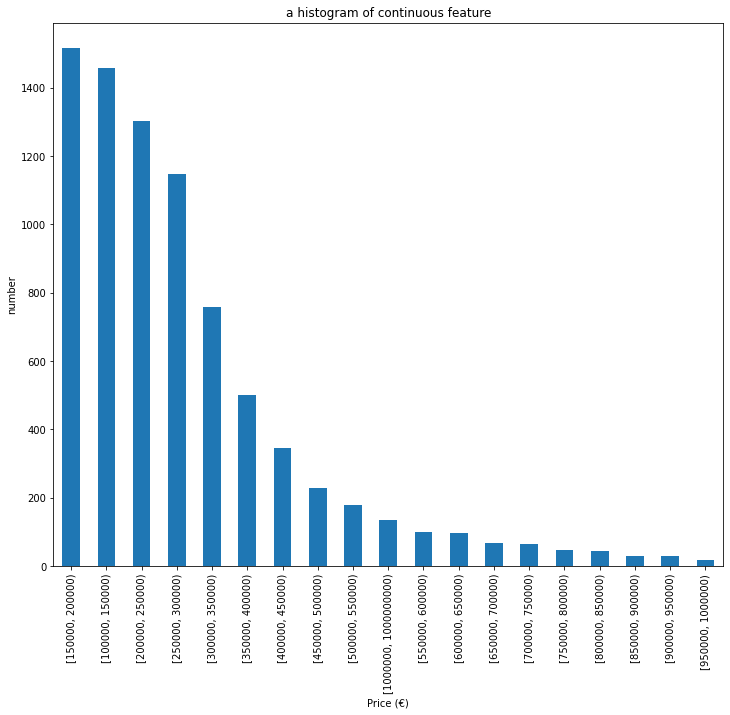

In [196]:
temp1 = list(range(100000,1050000,50000)) 
INF = 1000000000
temp1.append(INF)
print(temp1)
temp2 = pd.cut(df['Price (€)'],bins=temp1,right=False)
res = pd.value_counts(temp2)
res.plot(kind='bar',figsize=(12,10),title = "a histogram of continuous feature")
plt.ylabel('number')
plt.xlabel('Price (€)')


## 1.11 Plot box plots for all the continuous features.

We will now create box plots for the two new age features. This will help us to further visualise any potential outliers.

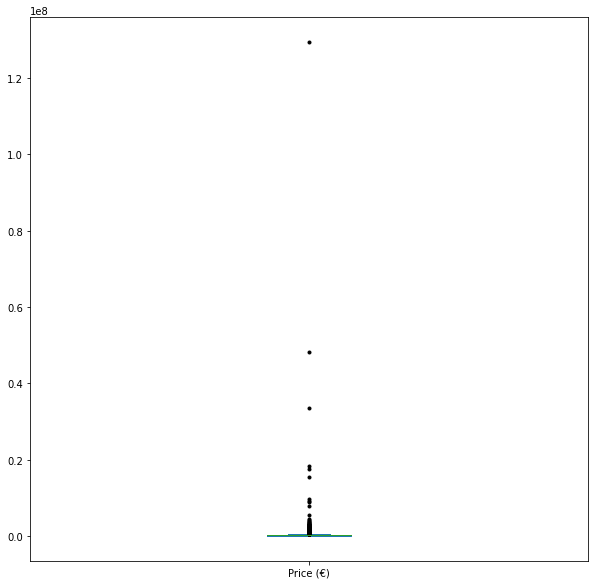

In [197]:
#Plot box plot for all the continuous features.
pp = PdfPages('ppr-21200542_continuous_box_plots.pdf')

for col in continuous_cols:
    f = df[col].plot(kind='box',figsize=(10,10),sym='k.')
    pp.savefig(f.get_figure())
    plt.show()  

pp.close()

We can see that there are many instances above the max value of the box plot.

## 1.12 Bar plots for categorical features

* As dicussed above, at this stage in the assignment we do not have any continuous features to plot. As a result, we will now move on to plotting the categorical features.

* We have already discussed how the categorical feature  Address have extremely high cardinalities. Box plots of these features will not be useful due to the high cardinalities. This issue will be addressed below.

* First, we will create bar plots for this categorical feature which have regular cardinalities.

In [198]:
# visualise the cardinalities again so that I know which to plot initially
category_columns = df.select_dtypes(['category']).columns
cardinality_of_features = list(df[category_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Unique Values"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in category_columns:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Unique Values
-------                              --------------- 

Address                              9983
Postal Code                          23
County                               26
Not Full Market Price                2
VAT Exclusive                        2
Description of Property              2
Property Size Description            5


In [199]:
#create a list of categorical features with a regular cardinality
categorical_with_low_cardinality = ['Postal Code', 'County', 'Not Full Market Price',
                            'VAT Exclusive', 'Description of Property', 'Property Size Description']

Next we will create a list of all features with regular cardinality.

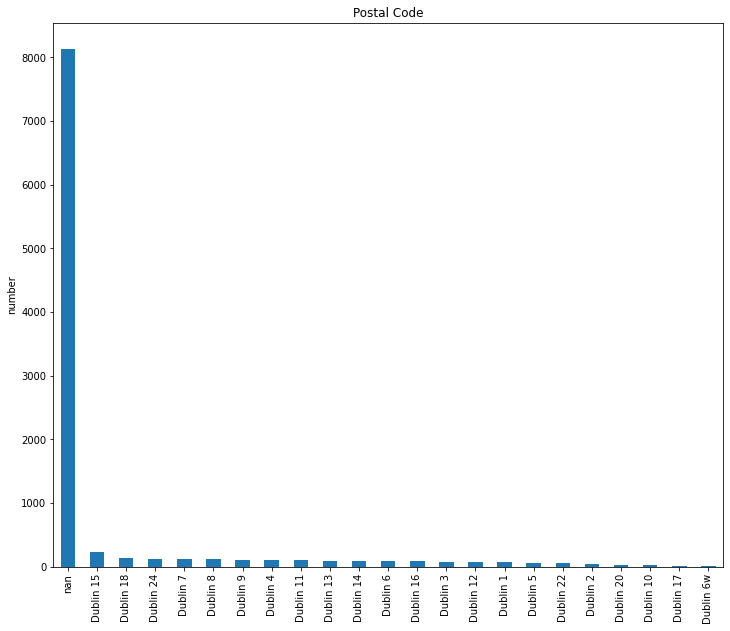

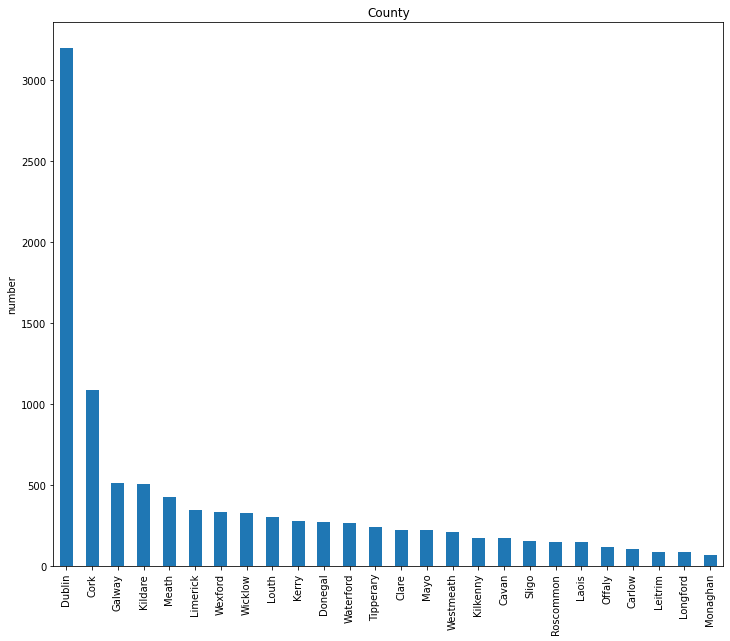

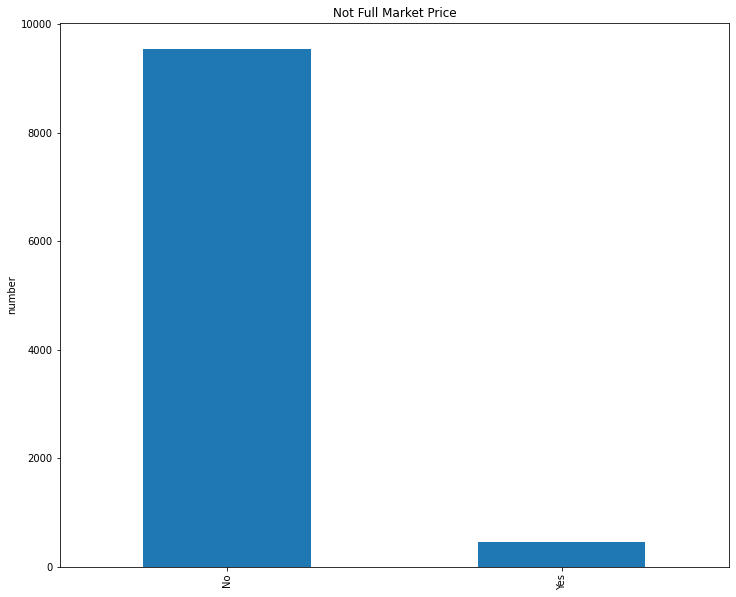

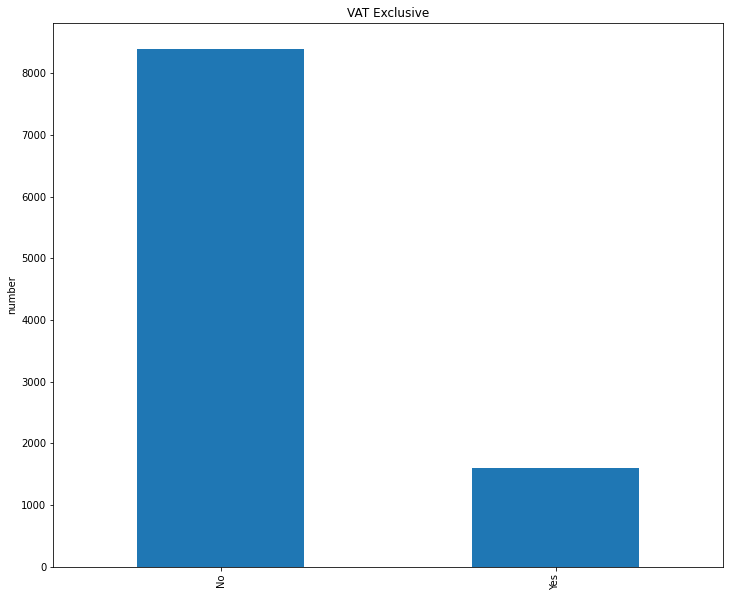

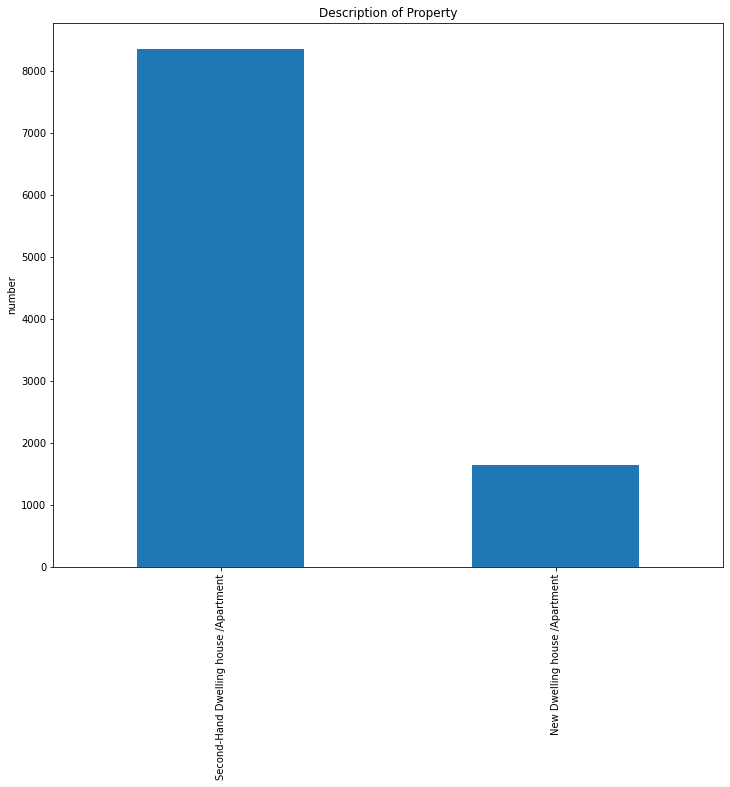

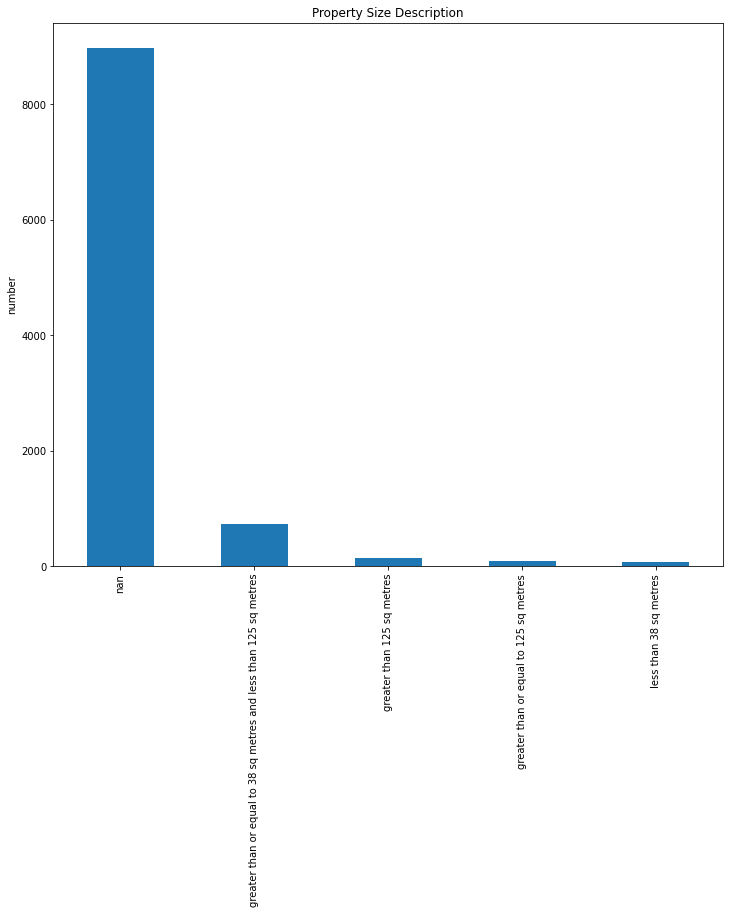

In [200]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('ppr-21200542_categorical_lowcardinality_barcharts.pdf')

#plot bar plots for all features
#dropna=Flase allows us to view the missing values
for column in categorical_with_low_cardinality:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(12,10))
    plt.ylabel('number')
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Categorical features with high cardinality
We will now plot each of the high cardinality features separately. Based on the frequencies returned above when testing for irregular cardinalities and permitted values, we have decided a suitable number of values to include in the plots. At this stage in the assignment, these plots are to give an idea of the representation of the values in these features and to highlight the issue of the high cardinality which will be addressed in the Data Quality Plan.

### Address:
The top 18 most frequent names will be plotted.

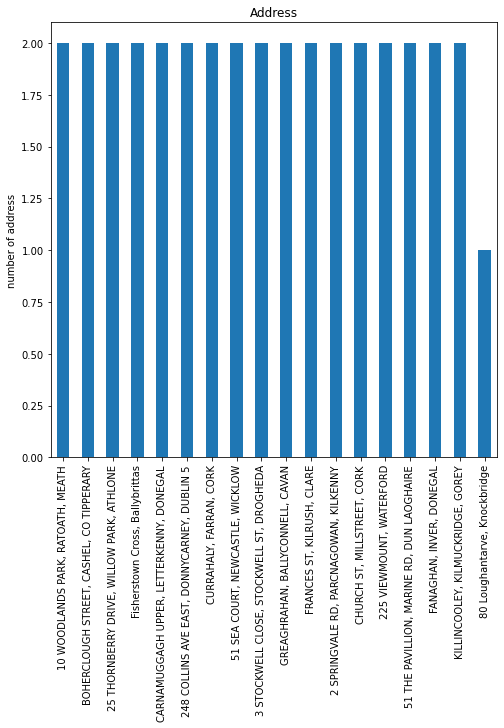

In [201]:
#plot top 18 most frequent as this makes sense based on the data above
name_most_frequent_plot = df['Address'].value_counts()[:18].sort_values(ascending=False)
name_most_frequent_plot.plot(kind='bar', title = "Address", figsize=(8,8))
plt.ylabel('number of address')
#save to pdf
plt.savefig('ppr-21200542_categorical_highcardinality_barcharts')

### Running Assesment:
* Cardinalities: As already noted, the high cardinalities of some features are an issue. It is difficult to extract meaningful information from these cardinalities and they and may present problems for machine learning algorithms.
* Missing Values: There are no missing values in the Address feature.
* Ambiguous values: There are no ambiguous values.

### Initial Findings:
Inital findings and detailed discussion for each feature can be found in the accompanying Data_Quality_Report.pdf file

## (2) - Prepare a Data Quality Plan for the cleaned csv file.

* 1 instances have failed logical integrity tests.
* Property Size Description is missing 89.64% of values.
* Post code is missing 81.34% of values.
* Price has many out liers.
* Property Size Description contains overlapping values

### Solutions to deal with the issues identified
* ***Failed logical integrity tests***. All logical integrity test results should be investigated further to see if the data makes sense. It is recommended that values are corrected if it makes sense to do so. If not, these instances shall be dropped.
* ***Missing Property Size Description values***. There are more than 89.64% missing data, and for those data we don't have enough infomation to replace missing feature values.
* ***Missing Post code values***. There are more than 89.64% missing data, and we can add some missing data with information from address. and the other missing data, we represent them with nan.
* ***Presence of outliers***. There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.
* ***Contains overlapping values*** contains overlapping values.

### Apply solutions to obtain a new csv file.

1. Failed logical integrity tests. All logical integrity test results should be investigated further to see if the data makes sense. If the data does not make sense, it is recommended that values are changed if it makes sense to do so. If not, these instances shall be dropped.

 - **Test 1:** Check if Post code is in dublin but County is another county which is impossible.
 
    - We saw that 21 instances failed this test. 

In [202]:
# create a dataframe containing the instances where Post code is in dublin but County is another county 
# or Address in one county and County is another county
test_1 = []
counties = []
# create county list
for i in pd.unique(df["County"].ravel()):
    counties.append(str(i).upper())
# use for loop to traverse the dataframe
for i in range(df.shape[0]):
    # county is assigned the value of the county of this row
    county = str(df.iloc[i]['County']).replace(' ','').upper()
    address_list = df.iloc[i]['Address'].split(',')
    # if county is other county but its postal code is in Dublin
    if (('DUBLIN' != county)):
        if(not pd.isnull(df.iloc[i]['Postal Code']) and 'Dublin' in df.iloc[i]['Postal Code']):
            test_1.append(df.iloc[i])
    for j in range(len(address_list)):
        temp = address_list[j].replace(' ','').upper()
        if(temp in counties and (county not in temp)):
            test_1.append(df.iloc[i])
test_1 = pd.DataFrame(test_1)

# print out the number of instances failing the test
print("Number of rows failing the test: ", test_1.shape[0])
# view the instance
test_1

Number of rows failing the test:  21


,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
204,2018-02-11,"20 ABBEY DR, RATHCULLIHEEN, WATERFORD",NaN,Kilkenny,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
398,2018-02-13,"KILCAVAN, GEASHILL, OFFALY",NaN,Laois,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
999,2018-04-04,"LEITRIM, NEWTOWNFORBES, CO LONGFORD",NaN,Longford,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1282,2015-07-15,"13 ABBEY PARK, FERRYBANK, WATERFORD",NaN,Kilkenny,60000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1504,2021-11-06,"24 Rathillion, Killeshin, Carlow",NaN,Laois,202643.17,No,Yes,New Dwelling house /Apartment,NaN
1530,2017-10-24,"SHEANE, RATHANGAN, KILDARE",NaN,Offaly,167000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1622,2019-02-05,"KEELOGUE, KILLESHIN, CARLOW",NaN,Laois,135000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2685,2020-07-31,"DUNGAR ROSCREA, TIPPERARY",NaN,Offaly,225000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
5378,2020-04-17,"35 OAKLEY CRESCENT, GRAIGUECULLEN, CARLOW",NaN,Laois,165000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
5437,2021-02-07,"17 ROSEHILL MULLAGH KELLS, MEATH",NaN,Cavan,120000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


We can see that in the cases where the address is inconsistant with value of county or post code is conflicting with the county. This does not make sense. All inconsistencies should be dropped.


    - Drop rows failing logical test

In [203]:
print("Total number of rows dropped: ", test_1.shape[0])
df = df.drop(test_1.index)

Total number of rows dropped:  21


We'll now retest the remaining failures, as it's likely that many of the inconsistencies were resolved by eliminating the 21 rows previously. Error-prone cells are more likely to be grouped together.

In [204]:
# create a dataframe containing the instances where Post code is in dublin but County is another county 
# or Address in one county and County is another county
test_1 = []
counties = []
# create county list
for i in pd.unique(df["County"].ravel()):
    counties.append(str(i).upper())
# use for loop to traverse the dataframe
for i in range(df.shape[0]):
    # county is assigned the value of the county of this row
    county = str(df.iloc[i]['County']).replace(' ','').upper()
    address_list = df.iloc[i]['Address'].split(',')
    # if county is other county but its postal code is in Dublin
    if (('DUBLIN' != county)):
        if(not pd.isnull(df.iloc[i]['Postal Code']) and 'Dublin' in df.iloc[i]['Postal Code']):
            test_1.append(df.iloc[i])
    for j in range(len(address_list)):
        temp = address_list[j].replace(' ','').upper()
        if(temp in counties and (county not in temp)):
            test_1.append(df.iloc[i])
test_1 = pd.DataFrame(test_1)

# print out the number of instances failing the test
print("Number of rows failing the test: ", test_1.shape[0])
# view the instance
test_1

Number of rows failing the test:  0


""


 - **Test 2:** Check if there are irregular address or ambiguous address.
 
    - We saw that 3 instances failed this test. 

In [205]:
# Check for irregular address string or ambiguous value
test_2 = []
for i in range(df.shape[0]):
    temp = df.iloc[i]['Address']
    cnt = 0
    for j in temp:
        j = str(j)
        if j.isnumeric():
            cnt += 1
    if(cnt > 9 ):
        test_2.append(df.iloc[i])
test_2 = pd.DataFrame(test_2)
# print out the number of 21200542 instances failing the test
print("Number of rows failing the test: ", test_2.shape[0])

Number of rows failing the test:  3


We can see that in the first case where the address is all numbers. This does not make sense. And the second and third cases are too ambiguous. Therefore, these cases should be dropped.


    - Drop rows failing logical test

In [206]:
print("Total number of rows dropped: ", test_2.shape[0])
df = df.drop(test_2.index)

Total number of rows dropped:  3


We'll now retest the remaining failures, as it's likely that many of the ambiguity was resolved by eliminating the 3 rows previously. Error-prone cells are more likely to be grouped together.

In [207]:
# Check for irregular address string or ambiguous value
test_2 = []
for i in range(df.shape[0]):
    temp = df.iloc[i]['Address']
    cnt = 0
    for j in temp:
        j = str(j)
        if j.isnumeric():
            cnt += 1
    if(cnt > 9 ):
        test_2.append(df.iloc[i])
test_2 = pd.DataFrame(test_2)
# print out the number of instances failing the test
print("Number of rows failing the test: ", test_2.shape[0])

Number of rows failing the test:  0


 - **Test 3:** Check if there are cases that datetime is later than 2022/01/24
 
    - We saw that 8 instances failed this test. 

In [208]:
# Check for cases that are later than 24 January 2022
test_3 = []
for i in range(df.shape[0]):
    if(df.iloc[i]['Date of Sale (dd/mm/yyyy)'] > np.datetime64('2022-01-24T00:00:00Z')):
        test_3.append(df.iloc[i])
test_3 = pd.DataFrame(test_3)
test_3.shape
print(df.shape)

(9977, 9)


We can see that in the these cases that trading hours are later than the form publication time. This does not make sense. Therefore, these cases should be dropped.


    - Drop rows failing logical test

In [209]:
# Check for cases that are later than 24 January 2022
print("Total number of rows dropped: ", test_3.shape[0])
df = df.drop(test_3.index)

Total number of rows dropped:  8


We'll now retest the remaining failures, as it's likely that many of the ambiguity was resolved by eliminating the 3 rows previously. Error-prone cells are more likely to be grouped together.

In [210]:
# Check for cases that are later than 24 January 2022
test_3 = []
for i in range(df.shape[0]):
    if(df.iloc[i]['Date of Sale (dd/mm/yyyy)'] > np.datetime64('2022-01-24T00:00:00Z')):
        test_3.append(df.iloc[i])
test_3 = pd.DataFrame(test_3)
test_3.shape

(0, 0)

**2. Missing Property Size Description values**
89.64% of the values for the *'Property Size Description'* feature are missing. This figure is too low to immediately drop the feature. I shall now investigate if there is any relationship between the missing county values, date-time type, Property Size Description,Not Full Market Price and VAT Exclusive. 

In [211]:
#view the top 20 features with missing Property Size Description values
missing_size_investigation_df = df.loc[df['Property Size Description'].isnull()]
#print out the following relevant columns
missing_size_investigation_df.head(20)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2018-09-13,"15 ARDKEALE, MOUNT OVAL VILLAGE, ROCHESTOWN",NaN,Cork,250000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2016-09-26,"APT.6 - THE MILLSTREAM, THE LINKS, PORTMARNOCK",Dublin 13,Dublin,249000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2016-04-05,"7 THE ORCHARD, DUNCARBERY, TULLAGHAN",NaN,Leitrim,50000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2016-11-15,"ROSE COTTAGE, NEW ST, KILKENNY",NaN,Kilkenny,112500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,2016-12-05,"16 HARDWICK STREET, CORK, COUNTY CORK",NaN,Cork,262000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5,2021-01-18,"6 GARDEN VILLAGE COURT, KILPEDDER, WICKLOW",NaN,Wicklow,345000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
6,2019-08-14,"1 LIME COURT, BELLVIEW WOODS, KILLARNEY",NaN,Kerry,295000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
7,2018-11-27,"11 TURNAPIN, COTTAGES, CLOGHRAN DUBLIN 17",NaN,Dublin,295000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
8,2015-08-14,"WEIGHBRIDGE PARK, CAMP ST, OUGHTERARD",NaN,Galway,112000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9,2018-04-04,"113 COOLAMBER PARK, KNOCKLYON, DUBLIN 16",Dublin 16,Dublin,582000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


 - We can see that there is no clear link between the condition and the lack of Property Size Description, nor is there any pattern of outcome with the lack of Property Size Description. It is assumed therefore, that the missing Property Size Description values make sense and are not due to invalid data.

 - The figure 89.64% is too low to impute. If the values were imputed to the mode 'Max', the central tendancy would be skewed.

-  It is obvious that the size of an property has an impact on its outcome. For this reason, this feature shall not be dropped yet.


In [212]:
#replace missing values with 'No_value'
df['Property Size Description'] = df['Property Size Description'].astype('string')
df['Property Size Description'] = df['Property Size Description'].fillna("No_value")
df['Property Size Description'] = df['Property Size Description'].astype('category')

In [213]:
#check that there are four values
df['Property Size Description'].unique()

['No_value', 'greater than or equal to 38 sq metres and les..., 'greater than 125 sq metres', 'less than 38 sq metres', 'greater than or equal to 125 sq metres']
Categories (5, object): ['No_value', 'greater than 125 sq metres', 'greater than or equal to 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'less than 38 sq metres']

**3. Missing Post code values**
81.34% of the values for the *' Post code'* feature are missing. This figure is too low to immediately drop the feature. I shall now investigate if there is any relationship between the missing county values, date-time type, Property Size Description,Not Full Market Price and VAT Exclusive. 

In [214]:
#view the top 20 features with missing Post code values
missing_code_investigation_df = df.loc[df['Postal Code'].isnull()]
#print out the following relevant columns
missing_code_investigation_df.head(20)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2018-09-13,"15 ARDKEALE, MOUNT OVAL VILLAGE, ROCHESTOWN",NaN,Cork,250000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
2,2016-04-05,"7 THE ORCHARD, DUNCARBERY, TULLAGHAN",NaN,Leitrim,50000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
3,2016-11-15,"ROSE COTTAGE, NEW ST, KILKENNY",NaN,Kilkenny,112500.0,Yes,No,Second-Hand Dwelling house /Apartment,No_value
4,2016-12-05,"16 HARDWICK STREET, CORK, COUNTY CORK",NaN,Cork,262000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
5,2021-01-18,"6 GARDEN VILLAGE COURT, KILPEDDER, WICKLOW",NaN,Wicklow,345000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
6,2019-08-14,"1 LIME COURT, BELLVIEW WOODS, KILLARNEY",NaN,Kerry,295000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
7,2018-11-27,"11 TURNAPIN, COTTAGES, CLOGHRAN DUBLIN 17",NaN,Dublin,295000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
8,2015-08-14,"WEIGHBRIDGE PARK, CAMP ST, OUGHTERARD",NaN,Galway,112000.0,No,No,Second-Hand Dwelling house /Apartment,No_value
10,2018-12-21,"6 Beechwood Heath, Beechwood, Hansfioeld",NaN,Dublin,319382.0,No,Yes,New Dwelling house /Apartment,No_value
11,2018-05-03,"APARTMENT 8, LOWER DORSET STREET, DUBLIN",NaN,Dublin,201000.0,No,No,Second-Hand Dwelling house /Apartment,No_value


 - We can see that there is no clear link between the condition and the lack of Postal code, nor is there any pattern of outcome with the lack of Postal code. It is assumed therefore, that the missing Posttal code values make sense and are not due to invalid data.

 - The figure 81.34% is too low to impute. If the values were imputed to the mode 'Max', the central tendancy would be skewed.

-  It is obvious that the size of an property has an impact on its outcome. For this reason, this feature shall not be dropped yet.

In [215]:
#replace missing values with 'No_value'
df['Postal Code'] = df['Postal Code'].astype('string')
df['Postal Code'] = df['Postal Code'].fillna("No_value")
df['Postal Code'] = df['Postal Code'].astype('category')

In [216]:
#check that there are 23 values
df['Postal Code'].unique()

['No_value', 'Dublin 13', 'Dublin 16', 'Dublin 1', 'Dublin 18', ..., 'Dublin 3', 'Dublin 22', 'Dublin 12', 'Dublin 20', 'Dublin 17']
Length: 23
Categories (23, object): ['Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12', ..., 'Dublin 7', 'Dublin 8', 'Dublin 9', 'No_value']

***4. Presence of outliers***. There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.

In [217]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
3894,2019-07-19,"266 Apts & 18 Commercial Units, Heuston South ...",Dublin 8,Dublin,1.295000e+08,No,No,Second-Hand Dwelling house /Apartment,No_value
77,2021-06-14,"Block B5 Dublin Landings, North Wall Quay Dub...",Dublin 1,Dublin,4.816299e+07,No,Yes,New Dwelling house /Apartment,No_value
4696,2017-03-24,"MONTROSE STUDENT RESIDENCE, STILLORGAN ROAD, D...",Dublin 4,Dublin,3.353800e+07,No,No,Second-Hand Dwelling house /Apartment,No_value
661,2013-12-20,"VICTORIA LODGE, VICTORIA CROSS, CORK",No_value,Cork,1.844111e+07,No,No,Second-Hand Dwelling house /Apartment,No_value
2449,2021-02-19,"Apartments 1-39, 19/20 Blackhall Street, Dublin 7",Dublin 7,Dublin,1.762114e+07,No,Yes,New Dwelling house /Apartment,No_value


Because these costly residences will have a significant impact on the correctness of the results, the data frame includes a huge amount of data, so deleting a problematic outlier will not harm the sample. To find and eliminate outliers, I opted to utilize the Interquartile Range (IQR) approach.

In [218]:
''' Detection '''
# IQR
Q1=df['Price (€)'].quantile(0.25)
Q3=df['Price (€)'].quantile(0.75)
IQR=Q3-Q1
 
print("Old Shape: ", df.shape)
 
test_4 = df[((df['Price (€)'] < Q1-1.5*IQR) |(df['Price (€)'] > Q3+1.5*IQR))]
# ''' Removing the Outliers '''
df.drop(test_4.index, inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (9969, 9)
New Shape:  (9415, 9)


***5. Contain overlapping values***. Property Size Description contains overlapping values, which are 'greater than 125 sq metres' and 'greater than or equal to 125 sq metres'. To avoid ambiguity, we can replace 'greater than 125 sq metres' with 'greater than or equal to 125 sq metres'

In [219]:
# replace 'greater than 125 sq metres' with 'greater than or equal to 125 sq metres'
df['Property Size Description'] = df['Property Size Description'].astype('string')
df['Property Size Description'].replace('greater than 125 sq metres','greater than or equal to 125 sq metres', inplace = True)
df['Property Size Description'] = df['Property Size Description'].astype('category')

In [220]:
# #check that there are five values
df['Postal Code'].unique()
df['Property Size Description'].unique()

['No_value', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']
Categories (4, object): ['No_value', 'greater than or equal to 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'less than 38 sq metres']

### Summary of data Quality plan

| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Date of Sale (dd/mm/yyyy)(datetime64[ns])          |  Some dates failed logical integrity tests.  |    Drop rows of failing instances|
Address      | Some dates failed logical integrity tests. |  Drop rows of failing instances.|
Address      | High cardinality (9983) |  Keep as is |
Postal Code	 (category)             |   Missing Values (81.34%)            | Fill the missing values with 'No_value'. |       
County (category)                 | None | Do Nothing | 
Price (€) (continuous)             | Outliers   | Drop rows of outliers | 
Not Full Market Price (category)                | None | Do Nothing |
VAT Exclusive (category)              | None | Do Nothing |
Description of Property (category)             | None | Do Nothing |
Property Size Descriptio(category)             | Missing Values (89.64%) | Fill the missing values with 'No_value'. 
Property Size Descriptio(category)             | Contain overlapping values | Replace greater than 125 sq metres with greater than or equal to 125 sq metres

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [221]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9415.0,210254.045678,122940.61459,5271.48,114538.0,192306.0,285000.0,582250.0


In [222]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Address,9415,9398,"CHURCH ST, MILLSTREET, CORK",2
Postal Code,9415,23,No_value,7798
County,9415,26,Dublin,2737
Not Full Market Price,9415,2,No,8960
VAT Exclusive,9415,2,No,7886
Description of Property,9415,2,Second-Hand Dwelling house /Apartment,7855
Property Size Description,9415,4,No_value,8420


In [223]:
# Print table with datetime64 statistics
df.select_dtypes(['datetime64']).describe().T

,count,unique,top,freq,first,last
Date of Sale (dd/mm/yyyy),9415,2746,2014-12-22,24,2010-01-02,2022-01-14


In [224]:
# Write the cleaned dataframe to a csv file
df.to_csv('ppr_21200542_cleaned.csv', index=False)

# (3). Exploring relationships between feature pairs:




### 3.1 Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plots or continuous-categorical plots or correlation plots). Explain your choices.

I will display pairwise feature interactions between a subset of characteristics that I believe may be indicative of the intended result in this area of the assignment.

The features that I will look at for pairwise feature interaction are the following continuous features:
- Price (€)': 
- Date of Sale (dd/mm/yyyy): 

And the look at the following categorical features: 
- Postal Code
- County
- Not Full Market Price
- VAT Exclusive
- Description of Property
- Property Size Description

The choices here I based on the idea that these particular features would be strong markers to indicate the credit risk of an applicant, as also discussed based on plots in the Data_Quality_report.pdf.

#### Correlations for the numeric features

<AxesSubplot:xlabel='Date of Sale (dd/mm/yyyy)', ylabel='Price (€)'>

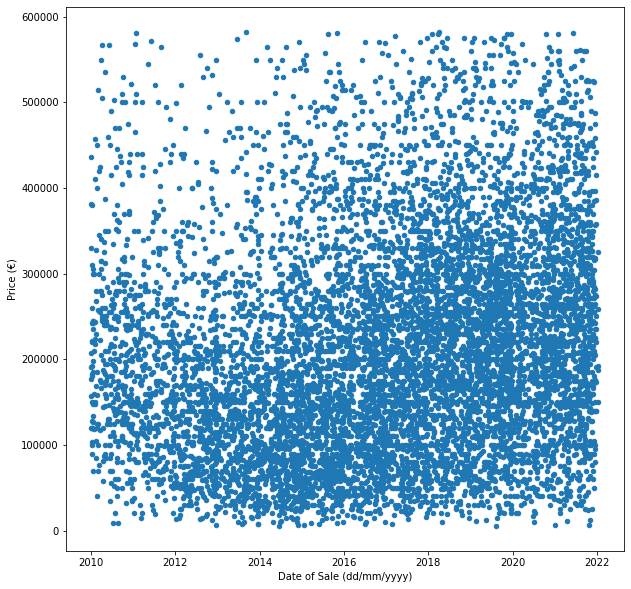

In [225]:
df.plot(kind='scatter', y='Price (€)', x='Date of Sale (dd/mm/yyyy)', figsize=(10,10))

The Date of Sale above as we believed they could have a strong impact on the price. 

### Continuous-categorical feature plots

1. Plot Price vs Not Full Market Price

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[Not Full Market Price]'>

<Figure size 432x288 with 0 Axes>

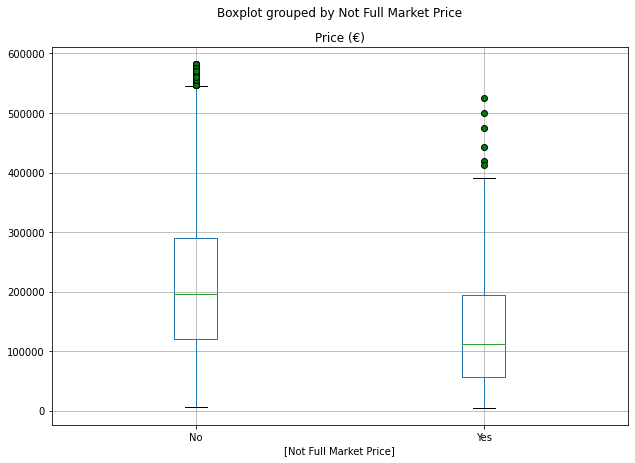

In [226]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['Not Full Market Price'], flierprops=flierprops, figsize=(10,7))

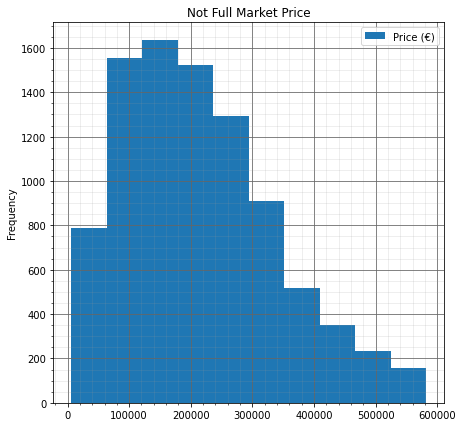

In [227]:
df[df['Not Full Market Price'] == "No"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="Not Full Market Price")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

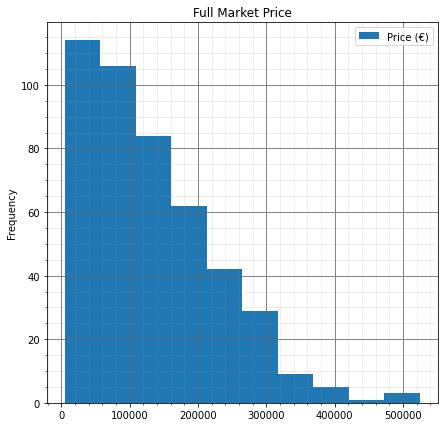

In [228]:
df[df['Not Full Market Price'] == "Yes"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="Full Market Price")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  - We can see from the above histograms that there is significantly higher price without full market price.
  - We can see from the above box plots that the median value of price for not full market price is approximately 190000 eruos while the median value for full market price is 110000. This is expected 
  - We can conclude that Not full market price is a good price marker.

2. Plot VAT Exclusive vs Price

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[VAT Exclusive]'>

<Figure size 432x288 with 0 Axes>

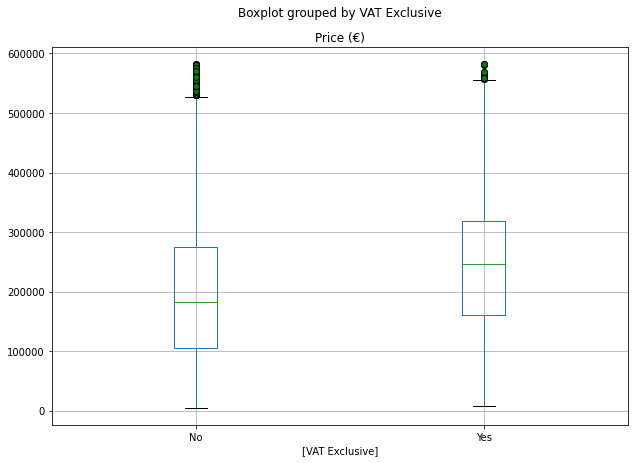

In [229]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['VAT Exclusive'], flierprops=flierprops, figsize=(10,7))

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[Description of Property]'>

<Figure size 432x288 with 0 Axes>

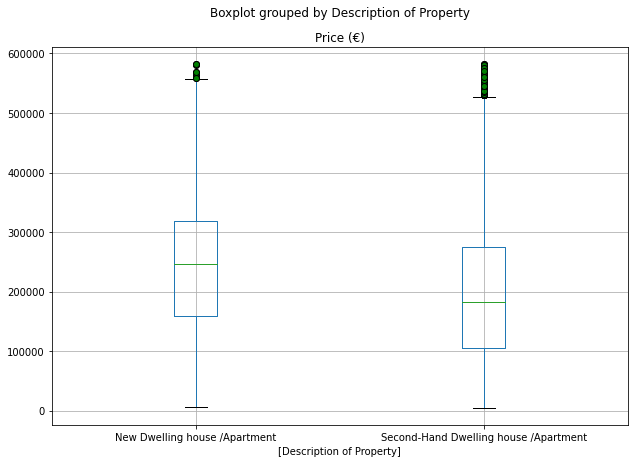

In [230]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['Description of Property'], flierprops=flierprops, figsize=(10,7))

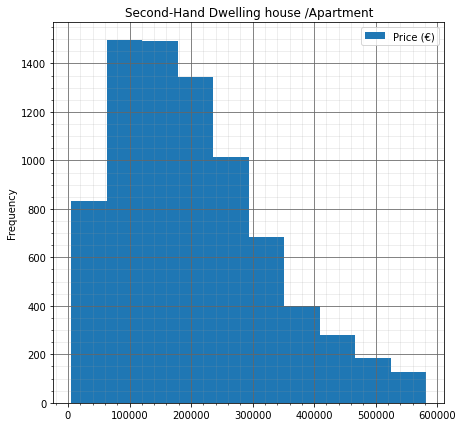

In [231]:
df[df['Description of Property'] == "Second-Hand Dwelling house /Apartment"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="Second-Hand Dwelling house /Apartment")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

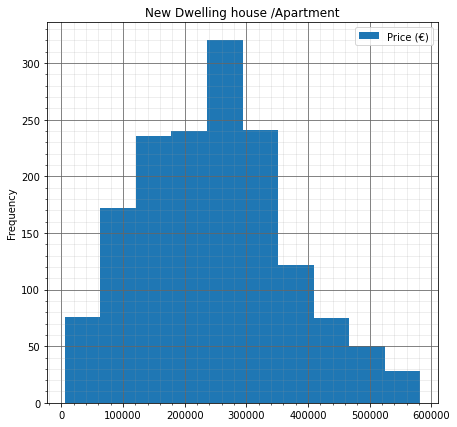

In [232]:
df[df['Description of Property'] == "New Dwelling house /Apartment"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="New Dwelling house /Apartment")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  - We can see from the above histograms that new dwelling house/apartment significantly has higher price.
  - We can see from the above box plots that the median value of price for new dwelling house/apartment is approximately 260000 eruos while the median value for second handed house/apartment is 160000. This is expected 
  - We can conclude that Description of Property is a good price marker.

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[County]'>

<Figure size 432x288 with 0 Axes>

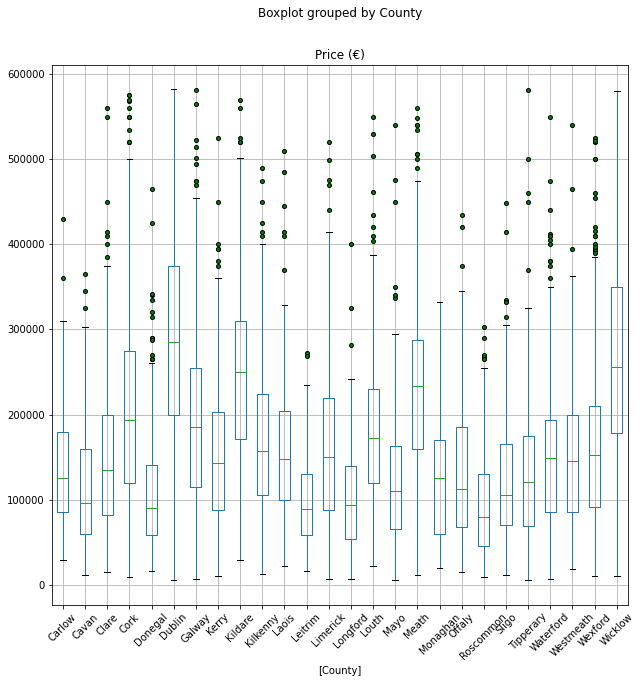

In [233]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=4,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['County'], flierprops=flierprops, figsize=(10,10), rot=45)


- We can see from the above box plots that Dublin, Wicklow, kildare has higher price.
- We can see from the above box plots that the median value of price for house in Dublin is approximately 280000 eruos. This is expected 
- We can conclude that County is a good price marker.

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[Property Size Description]'>

<Figure size 432x288 with 0 Axes>

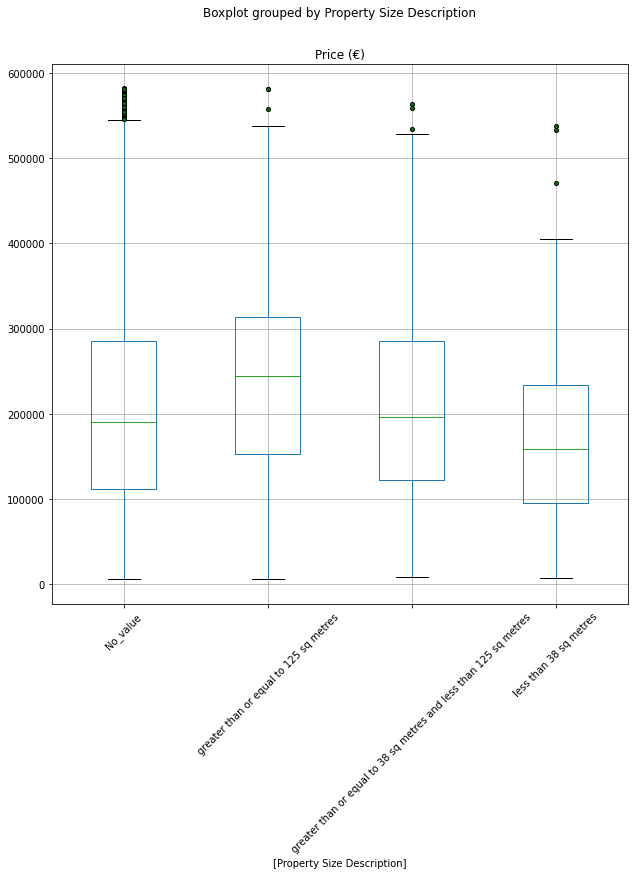

In [234]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=4,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['Property Size Description'], flierprops=flierprops, figsize=(10,10), rot=45)

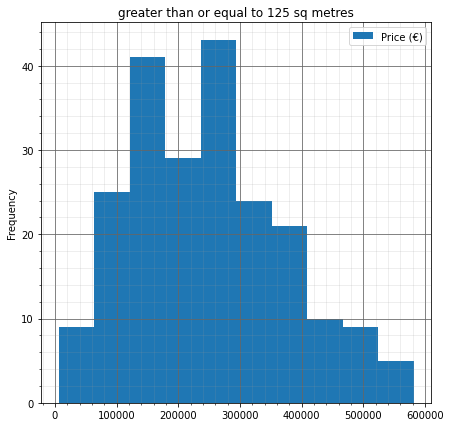

In [235]:
df[df['Property Size Description'] == "greater than or equal to 125 sq metres"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="greater than or equal to 125 sq metres")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

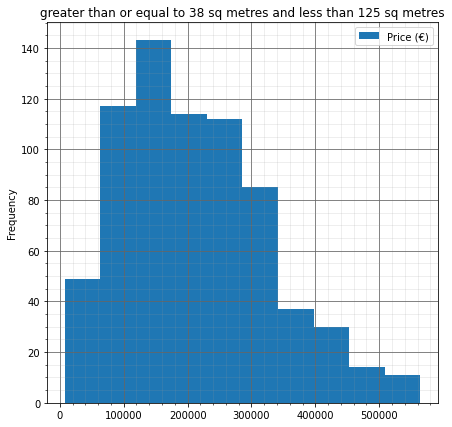

In [236]:
df[df['Property Size Description'] == "greater than or equal to 38 sq metres and less than 125 sq metres"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="greater than or equal to 38 sq metres and less than 125 sq metres")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

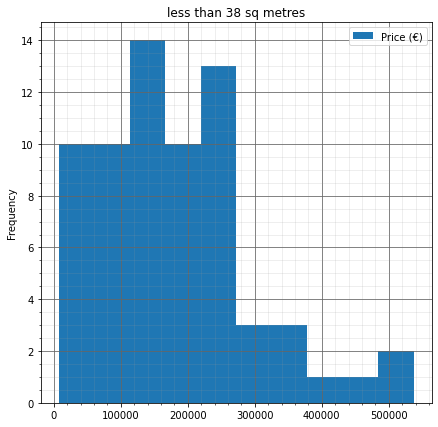

In [237]:
df[df['Property Size Description'] == "less than 38 sq metres"][['Price (€)']].plot(kind='hist',figsize=(7,7), bins=10, title="less than 38 sq metres")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

- We can see from the above box plots that house that is greater than or equal to 125 sq metres has higher price.
- We can see from the above box plots that the median value of price for house that is greater than or equal to 125 sq metres is approximately 200000 eruos. This is expected 
- We can conclude that Property Size Description is a good price marker.

<AxesSubplot:title={'center':'Price (€)'}, xlabel='[Postal Code]'>

<Figure size 432x288 with 0 Axes>

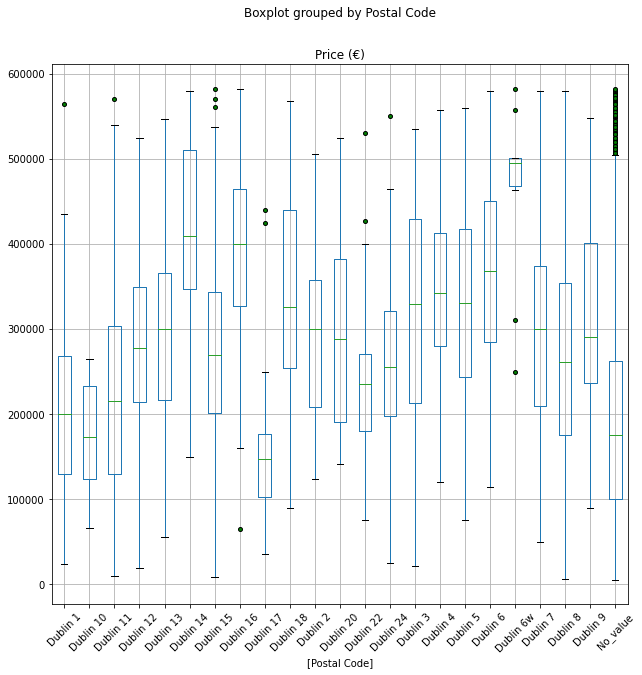

In [238]:

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=4,
                  linestyle='none')
df.boxplot(column=['Price (€)'], by=['Postal Code'], flierprops=flierprops, figsize=(10,10), rot=45)

- We can see from the above box plots that Dublin 14, Dublin 6w has higher price.
- We can see from the above box plots that the median value of price for house in Dublin 14 is approximately 400000 eruos. This is expected 
- We can conclude that Post Code is a good price marker.

### 3.2 Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

- Continuous vs Categorical
    - There is a strong connection between Postal Code, County, Not Full Market Price, VAT Exclusive, Description of Property, Property Size Description and Price.
    - The the size of the house, whether house is full market price, whether the house is new or second-hand, wthether the house is in Dublin and Post code are the likely predictors of Price outcome.

- Datetime64 vs Continuous
    - We see a strong connection between the Price and the Date of Sale. 
    - The later the transaction, the higher the median price of the house


## (4) - Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome.

Based on our findings throughout this assignment, we will now create some new features which will help with predicting the outcome of the price.

**New feature 1**

Upon initial exploration of the data it seemed that the feature *Property Size Description* would be better represented as two features representing the Property Size Description and whether Property Size Description was provided. However, we saw in part 3 that the only connection between *Property Size Description* and the price outcome is the Size Description. 

Therefore we conclude that splitting the feature will not provide any additional information and that a new binary feature which states whether the Property Size is known or not will be useful.

In [239]:
#create new feature equal to *Property Size Description*
df['Size_Known']=df['Property Size Description']

In [240]:
#check the unique values of the new feature
df['Size_Known'].unique()

['No_value', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']
Categories (4, object): ['No_value', 'greater than or equal to 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'less than 38 sq metres']

Next, if the value is unknown we replace it with 0

In [241]:
#replace the value unknown with 0
df['Size_Known'] = df['Size_Known'].str.replace('No_value', '0')

If the value is not 0, it implies the sex is known so we change it to 1.

In [242]:
# if the value is not 0 set it to 1
df['Size_Known'][df['Size_Known'].str.contains('0')==0] = '1'

We convert this new feature to a category type.

In [243]:
#convert the new feature to category type
df['Size_Known'] = df['Size_Known'].astype('category')

Now we will plot this new feature.

<AxesSubplot:>

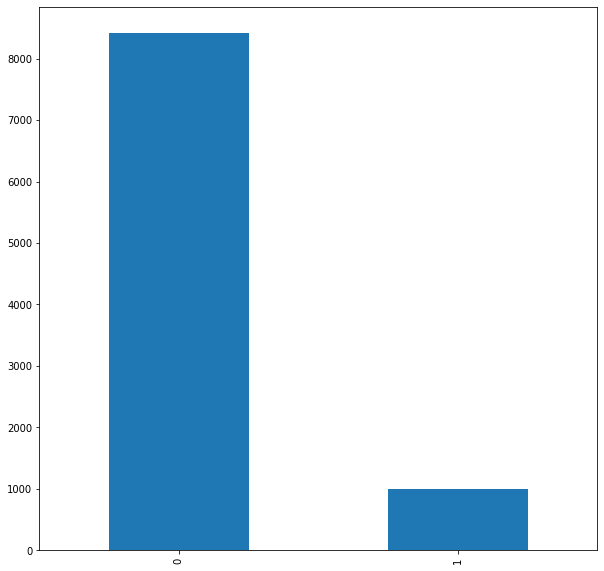

In [244]:
# plot the values of the new feature
df["Size_Known"].value_counts().plot(kind='bar', figsize=(10,10))

**New feature 2**

Upon initial exploration of the data it seemed that the feature *Postal Code* would be better represented as two features representing the Postal Code and whether Postal Code was provided. However, we saw in part 3 that the only connection between *Postal Code* and the price outcome is Postal Code. 

Therefore we conclude that splitting the feature will not provide any additional information and that a new binary feature which states whether the Postal Code is known or not will be useful.

In [245]:
#create new feature equal to *Property Size Description*
df['Postal_Code_Known']=df['Postal Code']

In [246]:
#check the unique values of the new feature
df['Postal_Code_Known'].unique()

['No_value', 'Dublin 13', 'Dublin 16', 'Dublin 1', 'Dublin 18', ..., 'Dublin 4', 'Dublin 22', 'Dublin 12', 'Dublin 20', 'Dublin 17']
Length: 23
Categories (23, object): ['Dublin 1', 'Dublin 10', 'Dublin 11', 'Dublin 12', ..., 'Dublin 7', 'Dublin 8', 'Dublin 9', 'No_value']

Next, if the value is unknown we replace it with no

In [247]:
#replace the value unknown with 0
df['Postal_Code_Known'] = df['Postal_Code_Known'].str.replace('No_value', 'No')

If the value is not 0, it implies the we do not know the post code so we change it to yes.

In [248]:
# if the value is not 0 set it to 1
df['Postal_Code_Known'][df['Postal_Code_Known'].str.contains('No')==0] = 'Yes'

We convert this new feature to a category type.

In [249]:
#convert the new feature to category type
df['Postal_Code_Known'] = df['Postal_Code_Known'].astype('category')

Now we will plot this new feature.

<AxesSubplot:>

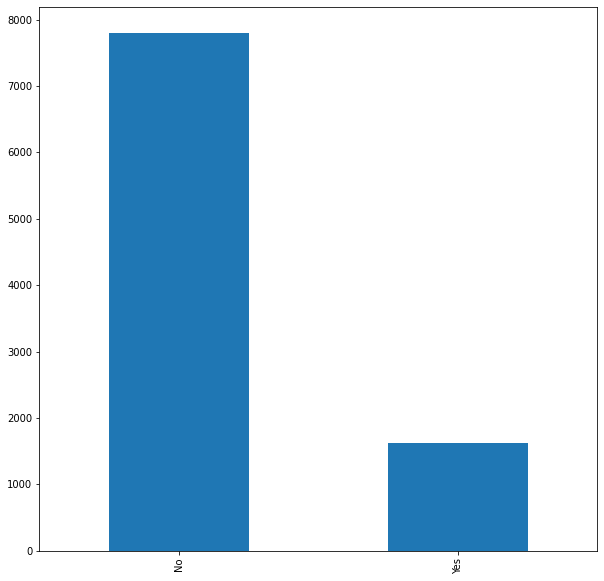

In [250]:
# plot the values of the new feature
df["Postal_Code_Known"].value_counts().plot(kind='bar', figsize=(10,10))

**New feature 3**

Upon initial exploration of the data it seemed that the feature *County* would be better represented as two features representing the County and whether County is Dublin. However, we saw in part 3 that the strong connection between *County* and the price outcome is whether in Dublin. 

Therefore we conclude that splitting the feature will not provide any additional information and that a new binary feature which states whether the house is in Dublin or not will be useful.

In [251]:
#create new feature equal to *Property Size Description*
df['In_Dublin']=df['County']

In [252]:
#check the unique values of the new feature
df['In_Dublin'].unique()

['Cork', 'Dublin', 'Leitrim', 'Kilkenny', 'Wicklow', ..., 'Donegal', 'Monaghan', 'Roscommon', 'Cavan', 'Offaly']
Length: 26
Categories (26, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

Next, if the value is Dublin we replace it with 1

In [253]:
# replace the value 'Dublin' with '1'
df['In_Dublin'] = df['In_Dublin'].str.replace('Dublin', '1')

If the value is not 1, it implies it is not in Dublin so we change it to 0.

In [254]:
# if the value is not 0 set it to 1
df['In_Dublin'][df['In_Dublin'].str.contains('1')==0] = '0'

We convert this new feature to a category type.

In [255]:
#convert the new feature to category type
df['In_Dublin'] = df['In_Dublin'].astype('category')

Now we will plot this new feature.

<AxesSubplot:>

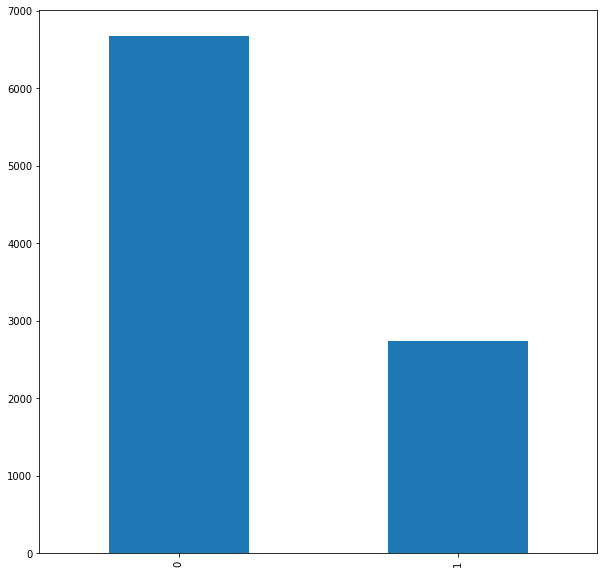

In [256]:
# plot the values of the new feature
df["In_Dublin"].value_counts().plot(kind='bar', figsize=(10,10))

**New feature 4**

Upon initial exploration of the data it seemed that the feature *Date of Sale* would be better represented as two features representing the year and the date. However, we saw in part 3 that the connection between *Date of Sale* and the price outcome is Year. 

Therefore we conclude that splitting the feature will not provide any additional information and that categorical feature which states the year of this sale.

In [257]:
# create new feature equal to *Date of Sale (dd/mm/yyyy)*
df['Year'] = df['Date of Sale (dd/mm/yyyy)']

In [258]:
#convert the new feature to datetime type
df['Year'] = pd.to_datetime(df['Year'])

replace the value of Year feature with the year of the date of sale

In [259]:
# replace the value of Year feature with the year of the date of sale
df['Year']=df['Year'].apply(lambda x: x.year)

In [260]:
# check the unique values of the new feature
df['Year'].unique()

array([2018, 2016, 2021, 2019, 2015, 2012, 2014, 2013, 2020, 2017, 2011,
       2010, 2022])

Now we will plot this new feature.

<AxesSubplot:>

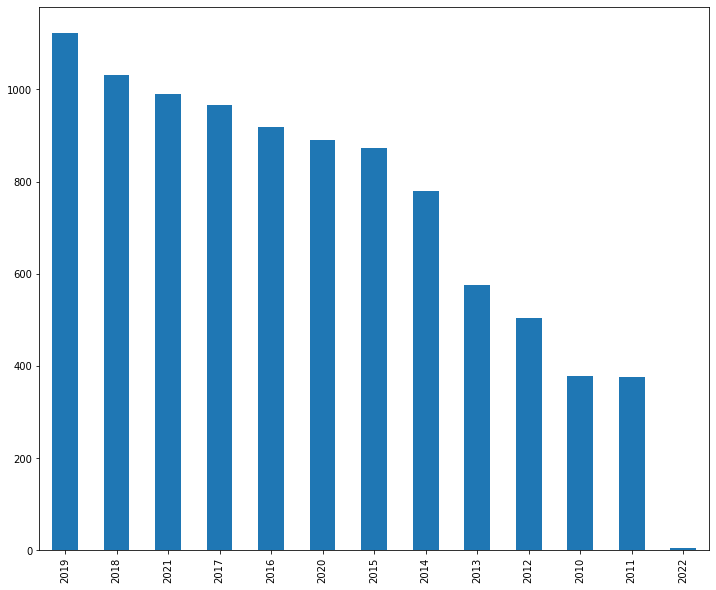

In [261]:
# plot the values of the new feature
df["Year"].value_counts().plot(kind='bar', figsize=(12,10))

### Check logical integrity of derived data 

 - Check if In_Dublin = '0' but post code is 'Yes'(impossible)

In [262]:
test_5 = df['County'][df['In_Dublin']=='0'][df['Postal Code']=='Yes']
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head()

Number of rows failing the test:  0


Series([], Name: County, dtype: category
Categories (26, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow'])

In [263]:
df = df.drop(test_5.index)

### To finish - Print data types, descriptive tables, save to csv

In [264]:
df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
Size_Known                         category
Postal_Code_Known                  category
In_Dublin                          category
Year                                  int64
dtype: object

In [265]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9415.0,210254.045678,122940.614590,5271.48,114538.0,192306.0,285000.0,582250.0
Year,9415.0,2016.490388,3.133305,2010.00,2014.0,2017.0,2019.0,2022.0


In [266]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Address,9415,9398,"CHURCH ST, MILLSTREET, CORK",2
Postal Code,9415,23,No_value,7798
County,9415,26,Dublin,2737
Not Full Market Price,9415,2,No,8960
VAT Exclusive,9415,2,No,7886
Description of Property,9415,2,Second-Hand Dwelling house /Apartment,7855
Property Size Description,9415,4,No_value,8420
Size_Known,9415,2,0,8420
Postal_Code_Known,9415,2,No,7798
In_Dublin,9415,2,0,6678


In [267]:
# Print table with datetime64 statistics
df.select_dtypes(['datetime64']).describe().T

,count,unique,top,freq,first,last
Date of Sale (dd/mm/yyyy),9415,2746,2014-12-22,24,2010-01-02,2022-01-14


In [268]:
# Write the cleaned dataframe to a csv file
df.to_csv('ppr_21200542_cleaned_new_features.csv', index=False)